# Analisis Prediksi Kandungan Nitrogen Tanah dengan Data Satelit


## 1. Import Libraries

In [69]:
# Data manipulation
import pandas as pd
import numpy as np
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Create output directory
import os
output_dir = '../REPORTS/OUTPUT/SATELIT'
os.makedirs(output_dir, exist_ok=True)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Dataset

In [70]:
# Lokasi file dataset
file_path = Path('../DATA/dataset_satelit.csv')
if not file_path.exists():
    file_path = Path('dataset_satelit.csv')

# Load dataset
df_raw = pd.read_csv(file_path)
print(f"✓ Dataset loaded: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")
print(f"\nKolom dataset:")
print(list(df_raw.columns))

✓ Dataset loaded: 594 rows, 34 columns

Kolom dataset:
['No', 'Longitude', 'Lattitude', 'N', 'P', 'K', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn', 'B', 'b12', 'b11', 'b9', 'b8a', 'b8', 'b7', 'b6', 'b5', 'b4', 'b3', 'b2', 'b1', 'Sigma_VV', 'Sigma_VH', 'plia', 'lia', 'iafe', 'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh']


## 3. Data Understanding

In [71]:
# Informasi dataset
print("=" * 80)
print("INFORMASI DATASET")
print("=" * 80)
df_raw.info()

INFORMASI DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float

In [72]:
# Preview data
print("\n" + "=" * 80)
print("PREVIEW DATA (5 baris pertama)")
print("=" * 80)
df_raw.head()


PREVIEW DATA (5 baris pertama)


,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [73]:
# Statistik deskriptif
print("\n" + "=" * 80)
print("STATISTIK DESKRIPTIF")
print("=" * 80)
df_raw.describe().T


STATISTIK DESKRIPTIF


,count,mean,std,min,25%,50%,75%,max
No,594.0,297.500000,171.617307,1.000000,149.250000,297.500000,445.750000,594.000000
Longitude,594.0,106.878644,4.949840,102.760857,102.927811,103.581969,113.403797,113.434700
Lattitude,594.0,-1.024933,0.965349,-2.333750,-2.233338,-0.602276,-0.257349,0.069251
N,594.0,2.259091,0.395499,1.140000,1.982500,2.280000,2.570000,3.230000
P,594.0,0.141380,0.019782,0.090000,0.130000,0.140000,0.150000,0.220000
K,593.0,0.582175,0.222567,0.122000,0.429000,0.549000,0.710000,1.489000
Ca,594.0,0.595094,0.366118,0.050000,0.320000,0.540000,0.790000,2.820000
Fe,594.0,74.613771,55.579655,21.080000,40.705000,65.650000,87.372500,559.100000
Mn,594.0,308.034697,241.731643,3.160000,124.015000,239.445000,434.990000,2009.320000
Cu,594.0,2.391195,1.580296,0.090000,1.172500,2.225000,3.357500,8.170000


## 4. Data Preprocessing

In [74]:
# Copy dataset untuk preprocessing
df = df_raw.copy()

print("=" * 80)
print("DATA CLEANING")
print("=" * 80)

# 1. Cleaning: hapus karakter non-numerik seperti '(', ')', spasi
print("\n1. Membersihkan karakter non-numerik...")
for col in df.columns:
    if col not in ['Longitude', 'Lattitude']:
        df[col] = df[col].astype(str).str.replace('[() ]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Cek missing values
print("\n2. Cek missing values...")
missing_before = df.isnull().sum().sum()
print(f"   Total missing values: {missing_before}")
if missing_before > 0:
    print(f"\n   Kolom dengan missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

# 3. Hapus kolom yang seluruh nilainya kosong
print("\n3. Menghapus kolom kosong...")
empty_cols = [col for col in df.columns if df[col].isna().all()]
if empty_cols:
    print(f"   Menghapus kolom: {empty_cols}")
    df.drop(columns=empty_cols, inplace=True)
else:
    print("   Tidak ada kolom kosong")

# 4. Imputasi missing values dengan median
print("\n4. Imputasi missing values dengan median...")
df.fillna(df.median(numeric_only=True), inplace=True)
missing_after = df.isnull().sum().sum()
print(f"   Missing values setelah imputasi: {missing_after}")

# 5. Hapus Column
print("\n5. Menghapus kolom yang tidak diperlukan...")
cols_to_drop = ['Lattitude', 'Longitude']
df.drop(columns=cols_to_drop, inplace=True)
print(f"   Menghapus kolom: {cols_to_drop}")

print(f"\n✓ Data cleaning selesai")
print(f"  Shape: {df.shape[0]} rows × {df.shape[1]} columns")

DATA CLEANING

1. Membersihkan karakter non-numerik...

2. Cek missing values...
   Total missing values: 2

   Kolom dengan missing values:
K     1
Mg    1
dtype: int64

3. Menghapus kolom kosong...
   Tidak ada kolom kosong

4. Imputasi missing values dengan median...
   Missing values setelah imputasi: 0

5. Menghapus kolom yang tidak diperlukan...
   Menghapus kolom: ['Lattitude', 'Longitude']

✓ Data cleaning selesai
  Shape: 594 rows × 32 columns


## 5. Feature Engineering

In [75]:
print("=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

# Definisi kelompok fitur berdasarkan karakteristik dataset satelit
# Target: N (Nitrogen)
target = 'N'

# 1. Nutrisi tanah (kecuali N yang jadi target)
nutrient_cols = ['P', 'K', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn', 'B']
nutrient_cols = [c for c in nutrient_cols if c in df.columns]

# 2. Band spektral (b1, b2, ..., b12, b8a, b9, b11, dll)
spectral_cols = [c for c in df.columns if c.startswith('b') and c not in ['beta0_vv', 'beta0_vh']]

# 3. SAR (Synthetic Aperture Radar)
sar_cols = ['Sigma_VV', 'Sigma_VH', 'gamma0_vv', 'gamma0_vh', 'beta0_vv', 'beta0_vh']
sar_cols = [c for c in sar_cols if c in df.columns]

# 4. Sudut geometris
angle_cols = ['plia', 'lia', 'iafe']
angle_cols = [c for c in angle_cols if c in df.columns]

# 5. Koordinat geografis
coord_cols = ['Longitude', 'Lattitude']
coord_cols = [c for c in coord_cols if c in df.columns]

# Gabungkan semua fitur
feature_cols = nutrient_cols + spectral_cols + sar_cols + angle_cols + coord_cols

print(f"\nKelompok Fitur:")
print(f"  • Nutrisi Tanah   : {len(nutrient_cols)} fitur")
print(f"  • Band Spektral   : {len(spectral_cols)} fitur")
print(f"  • SAR             : {len(sar_cols)} fitur")
print(f"  • Sudut Geometris : {len(angle_cols)} fitur")
print(f"  • Koordinat       : {len(coord_cols)} fitur")
print(f"\nTotal fitur       : {len(feature_cols)} fitur")
print(f"Target            : {target}")

# Verifikasi target ada dalam dataset
assert target in df.columns, f"Kolom target '{target}' tidak ditemukan dalam dataset!"

# Pisahkan features dan target
X = df[feature_cols]
y = df[target]

print(f"\n✓ Feature engineering selesai")
print(f"  X shape: {X.shape}")
print(f"  y shape: {y.shape}")

FEATURE ENGINEERING

Kelompok Fitur:
  • Nutrisi Tanah   : 9 fitur
  • Band Spektral   : 12 fitur
  • SAR             : 6 fitur
  • Sudut Geometris : 3 fitur
  • Koordinat       : 0 fitur

Total fitur       : 30 fitur
Target            : N

✓ Feature engineering selesai
  X shape: (594, 30)
  y shape: (594,)


## 6. Exploratory Data Analysis (EDA)

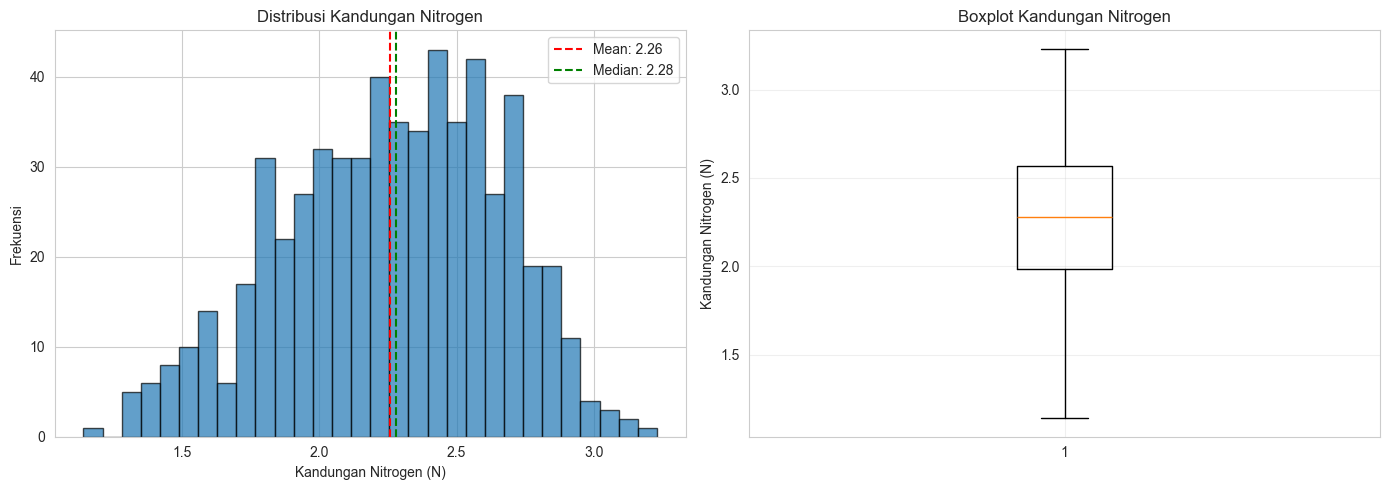

Statistik Target (N):
  Mean   : 2.26
  Median : 2.28
  Std    : 0.40
  Min    : 1.14
  Max    : 3.23


In [76]:
# Distribusi target (N)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(y, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Kandungan Nitrogen (N)')
axes[0].set_ylabel('Frekuensi')
axes[0].set_title('Distribusi Kandungan Nitrogen')
axes[0].axvline(y.mean(), color='red', linestyle='--', label=f'Mean: {y.mean():.2f}')
axes[0].axvline(y.median(), color='green', linestyle='--', label=f'Median: {y.median():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(y, vert=True)
axes[1].set_ylabel('Kandungan Nitrogen (N)')
axes[1].set_title('Boxplot Kandungan Nitrogen')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/distribusi_nitrogen.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Statistik Target (N):")
print(f"  Mean   : {y.mean():.2f}")
print(f"  Median : {y.median():.2f}")
print(f"  Std    : {y.std():.2f}")
print(f"  Min    : {y.min():.2f}")
print(f"  Max    : {y.max():.2f}")

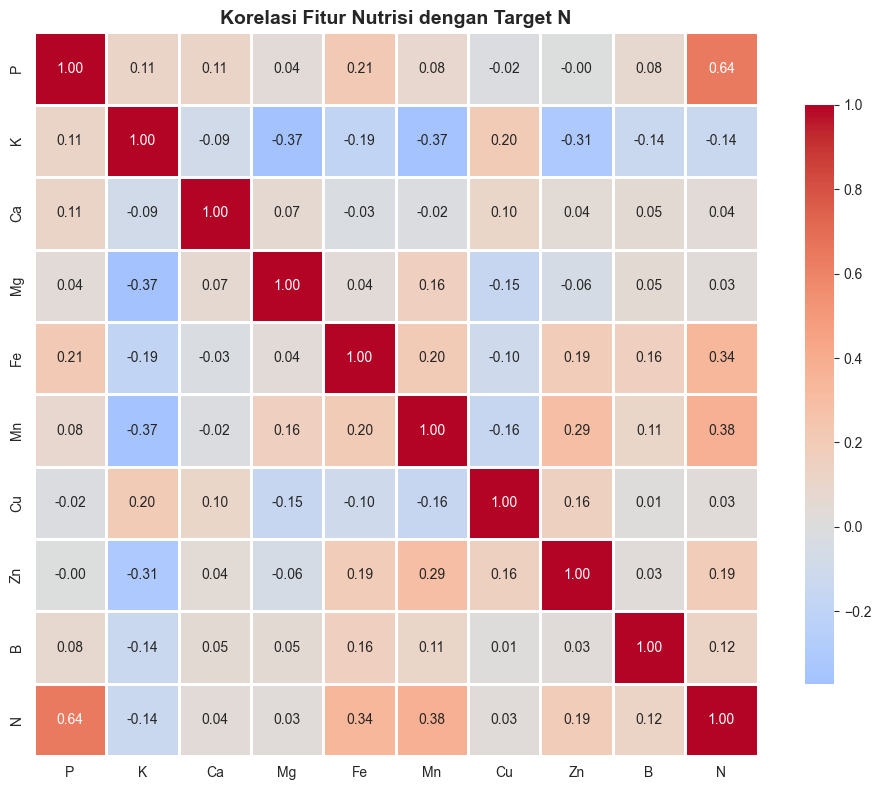


Top 5 fitur nutrisi berkorelasi dengan N:
P     0.643212
Mn    0.383059
Fe    0.338775
Zn    0.186446
B     0.122336
Name: N, dtype: float64


In [77]:
# Korelasi fitur nutrisi dengan target N
nutrient_target = nutrient_cols + [target]
corr_matrix = df[nutrient_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korelasi Fitur Nutrisi dengan Target N', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{output_dir}/korelasi_nutrisi.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 fitur nutrisi berkorelasi dengan N:")
n_corr = corr_matrix[target].drop(target).sort_values(ascending=False)
print(n_corr.head())

## 7. Train-Test Split

In [78]:
print("=" * 80)
print("TRAIN-TEST SPLIT")
print("=" * 80)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nData Training:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"\nData Testing:")
print(f"  X_test : {X_test.shape}")
print(f"  y_test : {y_test.shape}")

print(f"\n✓ Split selesai (80% train, 20% test)")

TRAIN-TEST SPLIT

Data Training:
  X_train: (475, 30)
  y_train: (475,)

Data Testing:
  X_test : (119, 30)
  y_test : (119,)

✓ Split selesai (80% train, 20% test)


## 8. Feature Scaling

In [79]:
print("=" * 80)
print("FEATURE SCALING")
print("=" * 80)

# Standardisasi untuk Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Standardisasi selesai (StandardScaler)")
print(f"  Mean setelah scaling: {X_train_scaled.mean():.6f}")
print(f"  Std setelah scaling : {X_train_scaled.std():.6f}")

FEATURE SCALING

✓ Standardisasi selesai (StandardScaler)
  Mean setelah scaling: -0.000000
  Std setelah scaling : 1.000000


## 9. Model Training

### 9.1. Linear Regression

In [80]:
print("=" * 80)
print("LINEAR REGRESSION")
print("=" * 80)

# Training Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluasi
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_rmse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_rmse_lr = mean_squared_error(y_test, y_test_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

print(f"\n✓ Training selesai")
print(f"\nPerforma Training:")
print(f"  R² Score : {train_r2_lr:.4f}")
print(f"  RMSE     : {train_rmse_lr:.4f}")
print(f"\nPerforma Testing:")
print(f"  R² Score : {test_r2_lr:.4f}")
print(f"  RMSE     : {test_rmse_lr:.4f}")
print(f"  MAE      : {test_mae_lr:.4f}")

LINEAR REGRESSION

✓ Training selesai

Performa Training:
  R² Score : 0.7929
  RMSE     : 0.0324

Performa Testing:
  R² Score : 0.6909
  RMSE     : 0.0468
  MAE      : 0.1576


### 9.2. Random Forest Regressor

In [81]:
print("=" * 80)
print("RANDOM FOREST REGRESSOR")
print("=" * 80)

# Training Random Forest (tidak perlu scaling)
rf_model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Prediksi
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluasi
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print(f"\n✓ Training selesai")
print(f"\nPerforma Training:")
print(f"  R² Score : {train_r2_rf:.4f}")
print(f"  RMSE     : {train_rmse_rf:.4f}")
print(f"\nPerforma Testing:")
print(f"  R² Score : {test_r2_rf:.4f}")
print(f"  RMSE     : {test_rmse_rf:.4f}")
print(f"  MAE      : {test_mae_rf:.4f}")

RANDOM FOREST REGRESSOR

✓ Training selesai

Performa Training:
  R² Score : 0.9676
  RMSE     : 0.0051

Performa Testing:
  R² Score : 0.7413
  RMSE     : 0.0392
  MAE      : 0.1462


## 10. Model Evaluation & Comparison

In [82]:
# Ringkasan metrik
metrics_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Train_R2': [train_r2_lr, train_r2_rf],
    'Test_R2': [test_r2_lr, test_r2_rf],
    'Train_RMSE': [train_rmse_lr, train_rmse_rf],
    'Test_RMSE': [test_rmse_lr, test_rmse_rf],
    'Test_MAE': [test_mae_lr, test_mae_rf]
})

print("=" * 80)
print("RINGKASAN PERFORMA MODEL")
print("=" * 80)
print(metrics_summary.to_string(index=False))

metrics_summary.to_csv(f'{output_dir}/model_metrics.csv', index=False)
print(f"\n✓ Metrik disimpan ke: {output_dir}/model_metrics.csv")

RINGKASAN PERFORMA MODEL
            Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Test_MAE
Linear Regression  0.792944 0.690883    0.032376   0.046815  0.157612
    Random Forest  0.967561 0.741347    0.005072   0.039172  0.146205

✓ Metrik disimpan ke: ../REPORTS/OUTPUT/SATELIT/model_metrics.csv


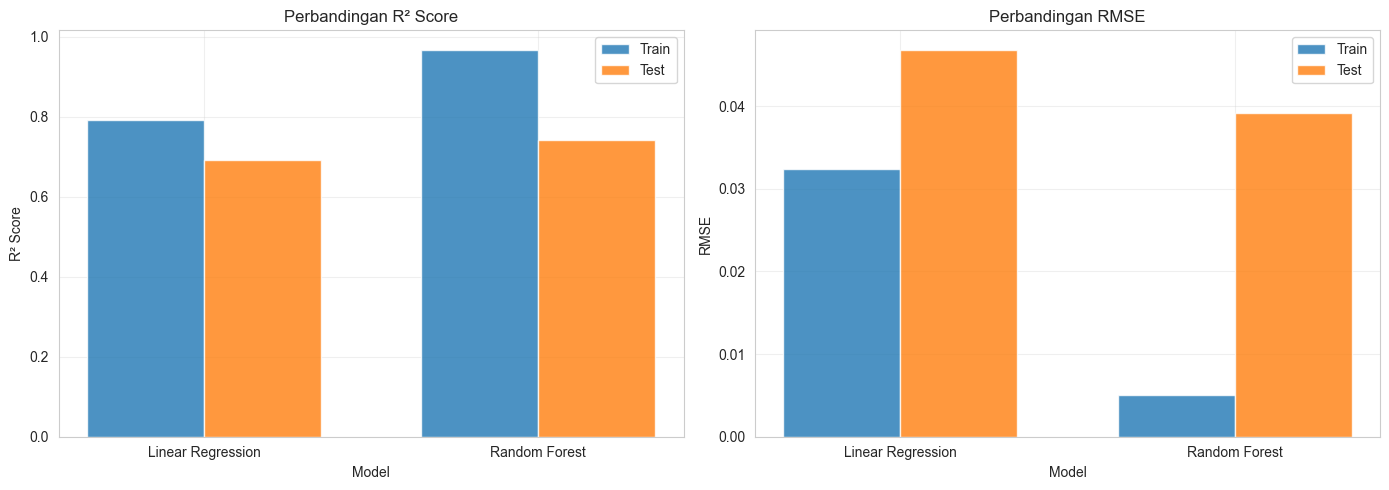

In [83]:
# Visualisasi perbandingan model
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score
models = metrics_summary['Model']
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, metrics_summary['Train_R2'], width, label='Train', alpha=0.8)
axes[0].bar(x + width/2, metrics_summary['Test_R2'], width, label='Test', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Perbandingan R² Score')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RMSE
axes[1].bar(x - width/2, metrics_summary['Train_RMSE'], width, label='Train', alpha=0.8)
axes[1].bar(x + width/2, metrics_summary['Test_RMSE'], width, label='Test', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Perbandingan RMSE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 11. Feature Importance (Random Forest)

TOP 15 FEATURE IMPORTANCE (Random Forest)
 Feature  Importance
    iafe    0.536555
       P    0.191062
      Fe    0.022754
      Mn    0.022066
      Mg    0.017768
      Zn    0.017599
       K    0.016250
      Cu    0.014148
       B    0.012783
      Ca    0.012224
beta0_vh    0.012189
     lia    0.010582
    plia    0.009624
      b8    0.009324
     b11    0.008508


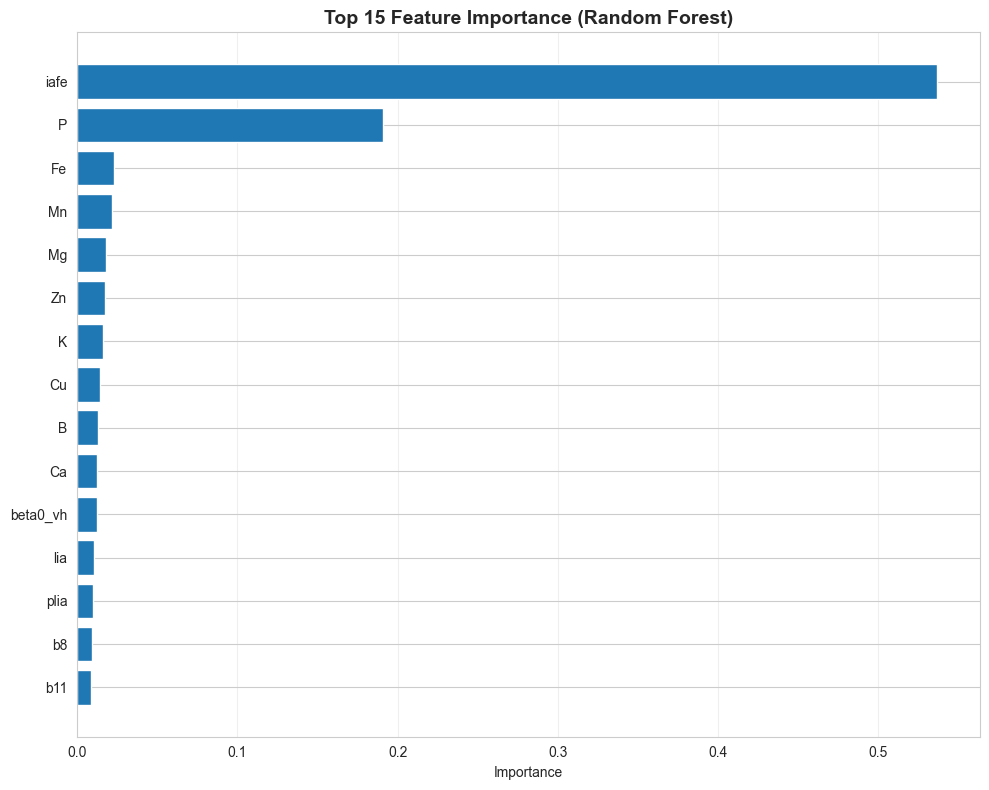


✓ Feature importance disimpan ke: ../REPORTS/OUTPUT/SATELIT/feature_importance.csv


In [84]:
# Feature importance dari Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 80)
print("TOP 15 FEATURE IMPORTANCE (Random Forest)")
print("=" * 80)
print(feature_importance.head(15).to_string(index=False))

# Visualisasi top 15 feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(f'{output_dir}/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Simpan feature importance
feature_importance.to_csv(f'{output_dir}/feature_importance.csv', index=False)
print(f"\n✓ Feature importance disimpan ke: {output_dir}/feature_importance.csv")

## 12. Prediction Visualization

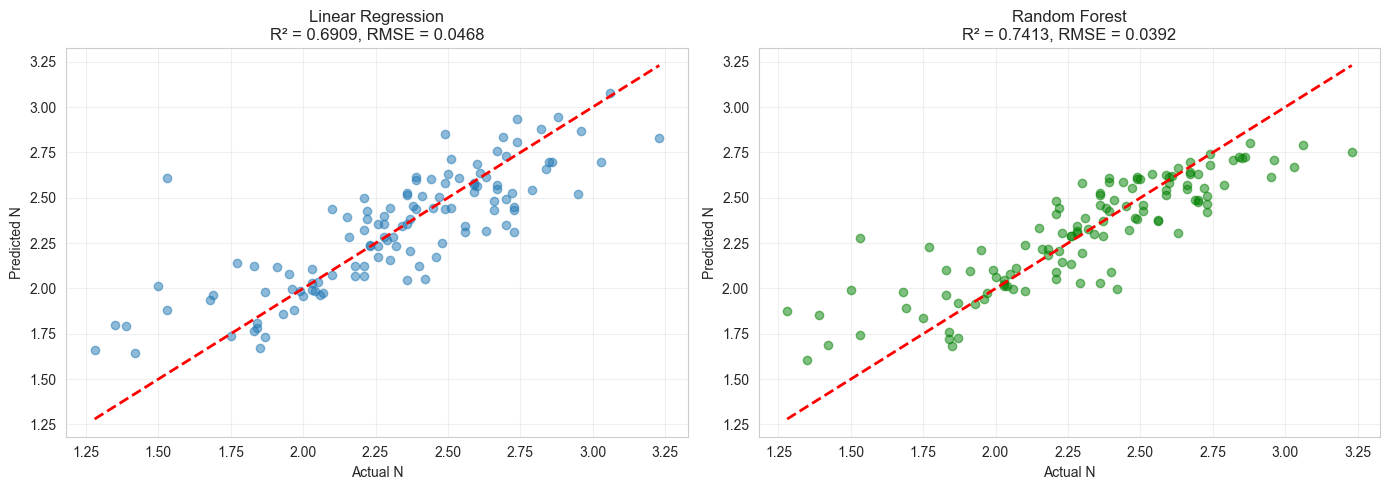

In [85]:
# Visualisasi prediksi vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression
axes[0].scatter(y_test, y_test_pred_lr, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual N')
axes[0].set_ylabel('Predicted N')
axes[0].set_title(f'Linear Regression\nR² = {test_r2_lr:.4f}, RMSE = {test_rmse_lr:.4f}')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_test_pred_rf, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual N')
axes[1].set_ylabel('Predicted N')
axes[1].set_title(f'Random Forest\nR² = {test_r2_rf:.4f}, RMSE = {test_rmse_rf:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/prediction_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

## 13. Residual Analysis

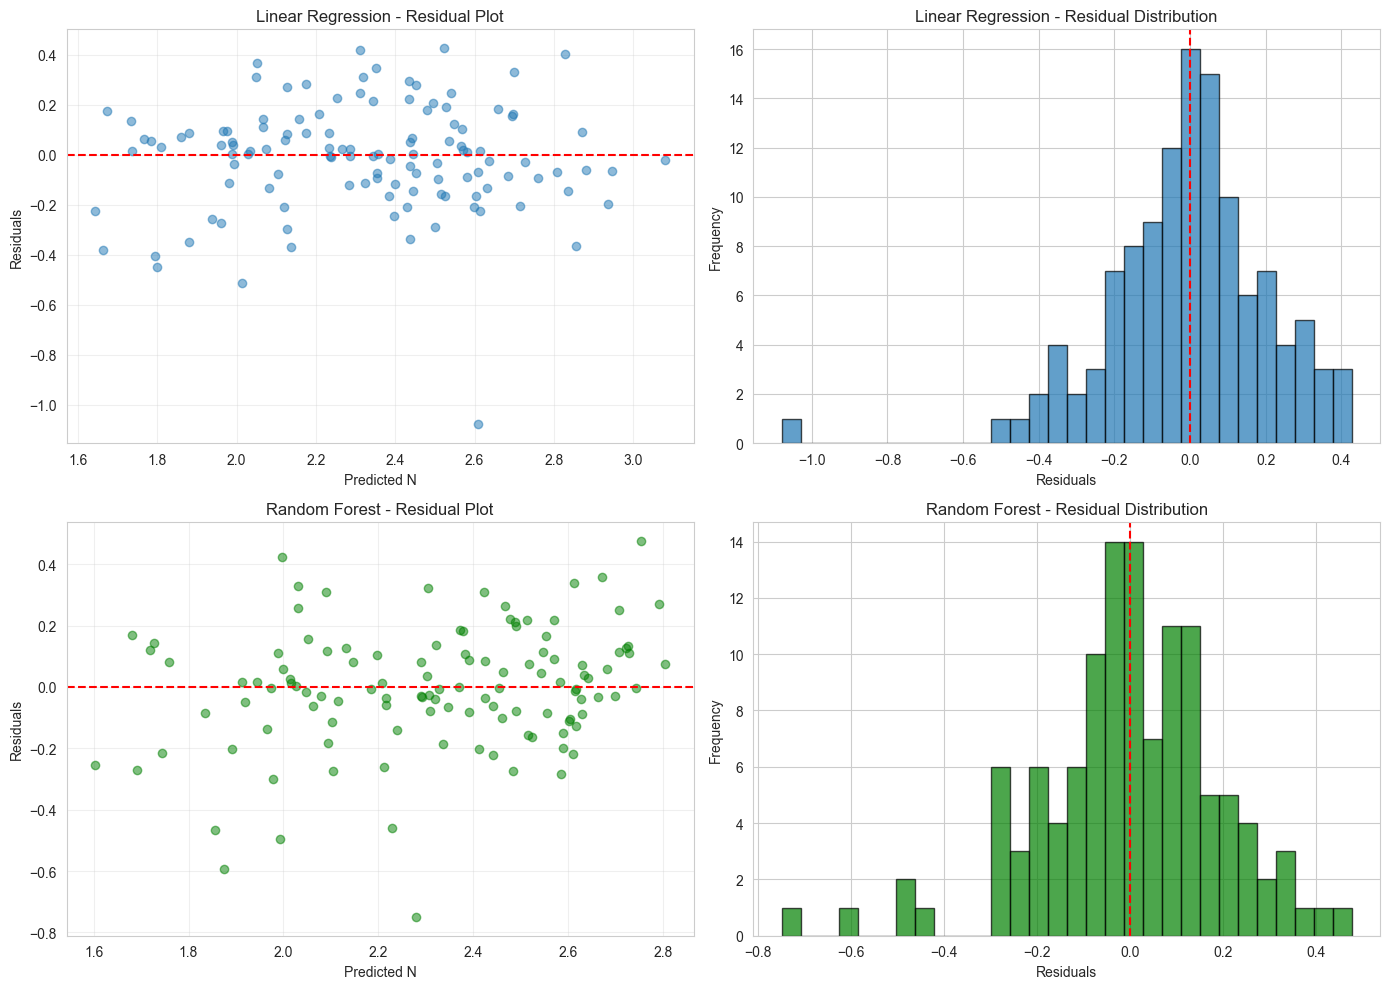

In [86]:
# Residual analysis
residuals_lr = y_test - y_test_pred_lr
residuals_rf = y_test - y_test_pred_rf

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Linear Regression - Residual plot
axes[0, 0].scatter(y_test_pred_lr, residuals_lr, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted N')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Linear Regression - Residual Plot')
axes[0, 0].grid(True, alpha=0.3)

# Linear Regression - Residual distribution
axes[0, 1].hist(residuals_lr, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Linear Regression - Residual Distribution')
axes[0, 1].axvline(0, color='r', linestyle='--')

# Random Forest - Residual plot
axes[1, 0].scatter(y_test_pred_rf, residuals_rf, alpha=0.5, color='green')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted N')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Random Forest - Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# Random Forest - Residual distribution
axes[1, 1].hist(residuals_rf, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Random Forest - Residual Distribution')
axes[1, 1].axvline(0, color='r', linestyle='--')

plt.tight_layout()
plt.savefig(f'{output_dir}/residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()